# Data Treatment for Stroke Dataset 
By Gabriela Gutiérrez-Colomer Santos 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Strokedataset.csv")  #Load data

pd.set_option('display.max_columns', None)  #Avoid python truncating dataset and showing all columns.
pd.set_option('display.max_rows', None)

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1. Data Description -Stroke Dataset- 

In [3]:
data.shape

(5110, 12)

In this dataset we will work with: 
- 5110 patients 
- 12 variables 

In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

This database has only 12 variables. `.columns` is a pandas function that shows the columns in data frames. Regaring the ratio of patients-variables, there should be 1 variable for each 10 patients, in this case we have a very low amount of variables compared to the patient. 

In [5]:
data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


With the describe function, we can visualize several important characteristics. For example, the majority of the patients are female, there are 2994 female patients and 2116 male patients. The mean age is 43 years old. The majority of the patients are married, there are 3353 married patients. 

The majority of the patients work in private institutions and live in urban areas. 1892 patients declared that they nerver smoked. 

0    4861
1     249
Name: stroke, dtype: int64

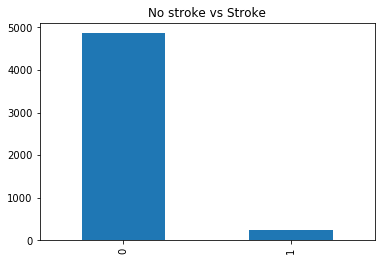

In [6]:
data['stroke'].value_counts().plot.bar(title="No stroke vs Stroke")
data["stroke"].value_counts() 

This database is highly unbalanced, there are too many no-stroke patients compared to those that actually sufferd a stroke

## Data Visualization 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

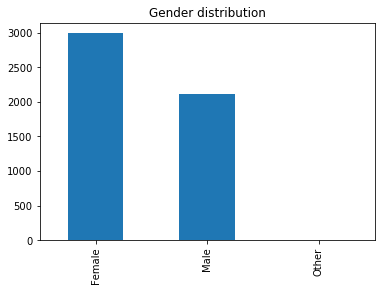

In [7]:
data['gender'].value_counts().plot.bar(title="Gender distribution")
data["gender"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['gender'].value_counts().plot.bar(title="Gender distribution")
data["gender"].value_counts()
plt.savefig('gender.png',format='png',dpi=200)

Yes    3353
No     1757
Name: ever_married, dtype: int64

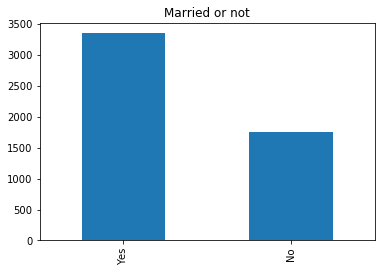

In [8]:
data['ever_married'].value_counts().plot.bar(title="Married or not")
data["ever_married"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['ever_married'].value_counts().plot.bar(title="Married or not")
data["ever_married"].value_counts()
plt.savefig('ever_married.png',format='png',dpi=200)

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

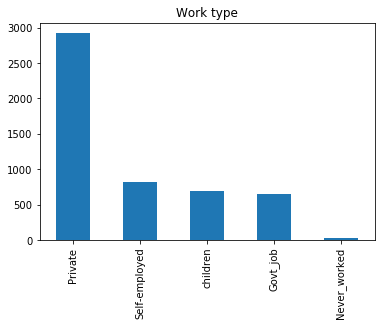

In [9]:
data['work_type'].value_counts().plot.bar(title="Work type")
data["work_type"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['work_type'].value_counts().plot.bar(title="Work_type")
data["work_type"].value_counts()
plt.savefig('work_type.png',format='png',dpi=200)

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

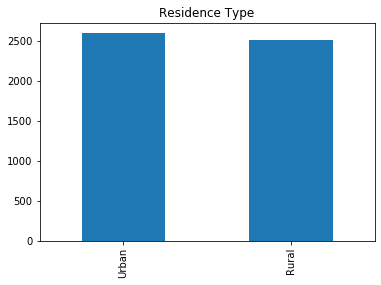

In [10]:
data['Residence_type'].value_counts().plot.bar(title="Residence Type")
data["Residence_type"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['Residence_type'].value_counts().plot.bar(title="Residence Type")
data["Residence_type"].value_counts()
plt.savefig('Residence_type.png',format='png',dpi=200)

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

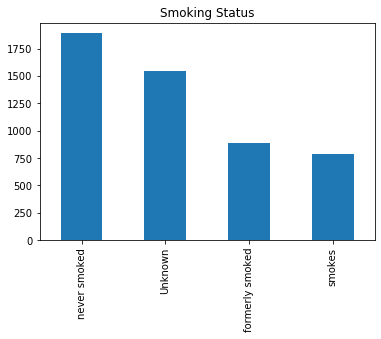

In [11]:
data['smoking_status'].value_counts().plot.bar(title="Smoking Status")
data["smoking_status"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['smoking_status'].value_counts().plot.bar(title="Smoking Status")
data["smoking_status"].value_counts()
plt.savefig('smoking.png',format='png',dpi=200)

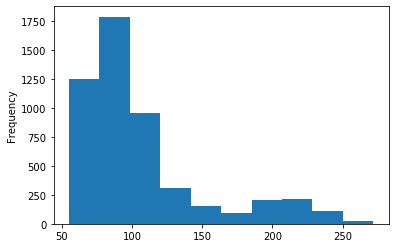

In [12]:
data['avg_glucose_level'].plot.hist()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['avg_glucose_level'].plot.hist()
plt.savefig('glucose.png',format='png',dpi=200)

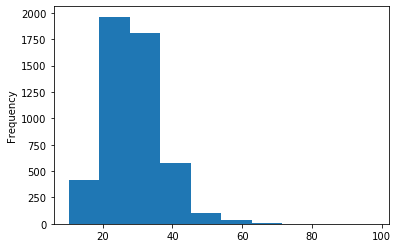

In [13]:
data['bmi'].plot.hist()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['bmi'].plot.hist()
plt.savefig('bmi.png',format='png',dpi=200)

0    4612
1     498
Name: hypertension, dtype: int64

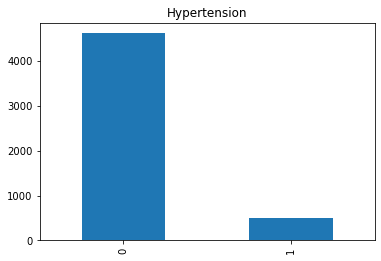

In [14]:
data['hypertension'].value_counts().plot.bar(title="Hypertension")
data["hypertension"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['hypertension'].plot.hist()
plt.savefig('hypertension.png',format='png',dpi=200)

0    4834
1     276
Name: heart_disease, dtype: int64

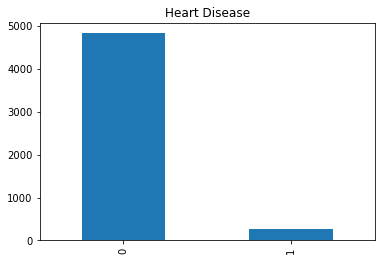

In [15]:
data['heart_disease'].value_counts().plot.bar(title="Heart Disease")
data["heart_disease"].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['heart_disease'].value_counts().plot.bar(title="Heart Disease")
data["heart_disease"].value_counts()
plt.savefig('heartdisease.png',format='png',dpi=200)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['hypertension'].value_counts().plot.bar(title="Hypertension")
data["hypertension"].value_counts()
plt.savefig('hypertension.png',format='png',dpi=200)

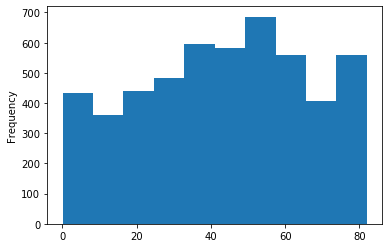

In [17]:
data['age'].plot.hist()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['age'].plot.hist()
plt.savefig('age.png',format='png',dpi=200)

## 2. Dealing with Missing Values -Stroke Dataset- 
### Do we have missing values in our database?
Regarding missing values we have `Unknown` values in the variabel `smoking_status`. We can either maintain the `Unknown` category or susbtitute the category by another. The one thing to do is to substitute the unknown category by the mode which in this case is `never_smoked`.  

In [18]:
(data == 'Unknown').sum(axis=0)

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [19]:
data = data.drop('id',axis = 1)

Id is not going to be relevant for this study

In [20]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

We have 6 numerical variables and 5 categorical. 

### Treating Missing Values 
To treat missing values, the best thing to do is to substitute the numerical variables that have missing values by the mean of the variable and to substitute categorical variables with the mode of the variable. 

In [21]:
mode_smoking_status = data['smoking_status'].describe().loc['top']
data['bmi'].fillna(value=data['bmi'].mean(), inplace=True)

In [22]:
data = data.replace({'smoking_status': 'Unknown'}, mode_smoking_status)

In [23]:
numerical_change = {"ever_married": {"Yes": 1, "No": 0},}

In [24]:
data = data.replace(numerical_change)

### One Hot Encoder 

In [25]:
# Get one hot encoding of columns B
one_hot_gender = pd.get_dummies(data['gender'], prefix='gender')
one_hot_work_type = pd.get_dummies(data['work_type'], prefix='work_type')
one_hot_Residence_type = pd.get_dummies(data['Residence_type'], prefix='Residence_type')
one_hot_smoking_status = pd.get_dummies(data['smoking_status'], prefix='smoking_status')
# Drop column B as it is now encoded
data = data.drop('gender',axis = 1)
data = data.drop('work_type', axis = 1)
data = data.drop('Residence_type', axis = 1)
data = data.drop('smoking_status', axis = 1)
# Join the encoded df
data = data.join(one_hot_gender)
data = data.join(one_hot_work_type)
data = data.join(one_hot_Residence_type)
data = data.join(one_hot_smoking_status)
data.head(10)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,1,0,0
1,61.0,0,0,1,202.21,28.893237,1,1,0,0,0,0,0,1,0,1,0,0,1,0
2,80.0,0,1,1,105.92,32.500000,1,0,1,0,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4,79.0,1,0,1,174.12,24.000000,1,1,0,0,0,0,0,1,0,1,0,0,1,0
5,81.0,0,0,1,186.21,29.000000,1,0,1,0,0,0,1,0,0,0,1,1,0,0
6,74.0,1,1,1,70.09,27.400000,1,0,1,0,0,0,1,0,0,1,0,0,1,0
7,69.0,0,0,0,94.39,22.800000,1,1,0,0,0,0,1,0,0,0,1,0,1,0
8,59.0,0,0,1,76.15,28.893237,1,1,0,0,0,0,1,0,0,1,0,0,1,0
9,78.0,0,0,1,58.57,24.200000,1,1,0,0,0,0,1,0,0,0,1,0,1,0


In [26]:
data.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object